# Read in catalog information from a text file and plot some parameters

## Authors
Adrian Price-Whelan, Kelle Cruz, Stephanie T. Douglas

## Learning Goals
* Read an ASCII file using `astropy.io`
* Convert between representations of coordinate components using `astropy.coordinates` (hours to degrees)
* Make a spherical projection sky plot using `matplotlib`

## Keywords
file input/output, coordinates, tables, units, scatter plots, matplotlib

## Summary

This tutorial demonstrates the use of `astropy.io.ascii` for reading ASCII data, `astropy.coordinates` and `astropy.units` for converting RA (as a sexagesimal angle) to decimal degrees, and `matplotlib` for making a color-magnitude diagram and on-sky locations in a Mollweide projection.

In [1]:
with open('requirements.txt') as f:
    print(f"Required packages for this notebook:\n{f.read()}")

Required packages for this notebook:
astropy
matplotlib
numpy



In [2]:
import numpy as np

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Astropy provides functionality for reading in and manipulating tabular
data through the `astropy.table` subpackage. An additional set of
tools for reading and writing ASCII data are provided with the
`astropy.io.ascii` subpackage, but fundamentally use the classes and
methods implemented in `astropy.table`.

We'll start by importing the `ascii` subpackage:

In [3]:
from astropy.io import ascii

For many cases, it is sufficient to use the `ascii.read('filename')` 
function as a black box for reading data from table-formatted text 
files. By default, this function will try to figure out how your 
data is formatted/delimited (by default, `guess=True`). For example, 
if your data are:

    # name,ra,dec
    BLG100,17:51:00.0,-29:59:48
    BLG101,17:53:40.2,-29:49:52
    BLG102,17:56:20.2,-29:30:51
    BLG103,17:56:20.2,-30:06:22
    ...

(see _simple_table.csv_)

`ascii.read()` will return a `Table` object:

In [4]:
tbl = ascii.read("simple_table.csv")
tbl

name,ra,dec
str6,str10,str9
BLG100,17:51:00.0,-29:59:48
BLG101,17:53:40.2,-29:49:52
BLG102,17:56:20.2,-29:30:51
BLG103,17:56:20.2,-30:06:22


The header names are automatically parsed from the top of the file,
and the delimiter is inferred from the rest of the file -- awesome! 
We can access the columns directly from their names as 'keys' of the
table object:

In [5]:
tbl["ra"]

17:51:00.0
17:53:40.2
17:56:20.2
17:56:20.2


If we want to then convert the first RA (as a sexagesimal angle) to
decimal degrees, for example, we can pluck out the first (0th) item in
the column and use the `coordinates` subpackage to parse the string:

In [6]:
import astropy.coordinates as coord
import astropy.units as u

first_row = tbl[0] # get the first (0th) row
ra = coord.Angle(first_row["ra"], unit=u.hour) # create an Angle object
ra.degree # convert to degrees

np.float64(267.75)

Now let's look at a case where this breaks, and we have to specify some
more options to the `read()` function. Our data may look a bit messier::

    ,,,,2MASS Photometry,,,,,,WISE Photometry,,,,,,,,Spectra,,,,Astrometry,,,,,,,,,,,
    Name,Designation,RA,Dec,Jmag,J_unc,Hmag,H_unc,Kmag,K_unc,W1,W1_unc,W2,W2_unc,W3,W3_unc,W4,W4_unc,Spectral Type,Spectra (FITS),Opt Spec Refs,NIR Spec Refs,pm_ra (mas),pm_ra_unc,pm_dec (mas),pm_dec_unc,pi (mas),pi_unc,radial velocity (km/s),rv_unc,Astrometry Refs,Discovery Refs,Group/Age,Note
    ,00 04 02.84 -64 10 35.6,1.01201,-64.18,15.79,0.07,14.83,0.07,14.01,0.05,13.37,0.03,12.94,0.03,12.18,0.24,9.16,null,L1γ,,Kirkpatrick et al. 2010,,,,,,,,,,,Kirkpatrick et al. 2010,,
    PC 0025+04,00 27 41.97 +05 03 41.7,6.92489,5.06,16.19,0.09,15.29,0.10,14.96,0.12,14.62,0.04,14.14,0.05,12.24,null,8.89,null,M9.5β,,Mould et al. 1994,,0.0105,0.0004,-0.0008,0.0003,,,,,Faherty et al. 2009,Schneider et al. 1991,,,00 32 55.84 -44 05 05.8,8.23267,-44.08,14.78,0.04,13.86,0.03,13.27,0.04,12.82,0.03,12.49,0.03,11.73,0.19,9.29,null,L0γ,,Cruz et al. 2009,,0.1178,0.0043,-0.0916,0.0043,38.4,4.8,,,Faherty et al. 2012,Reid et al. 2008,,
    ...

(see _Young-Objects-Compilation.csv_)

If we try to just use `ascii.read()` on this data, it fails to parse the names out and the column names become `col` followed by the number of the column:

In [7]:
tbl = ascii.read("Young-Objects-Compilation.csv")
tbl.colnames

['col1',
 'col2',
 'col3',
 'col4',
 'col5',
 'col6',
 'col7',
 'col8',
 'col9',
 'col10',
 'col11',
 'col12',
 'col13',
 'col14',
 'col15',
 'col16',
 'col17',
 'col18',
 'col19',
 'col20',
 'col21',
 'col22',
 'col23',
 'col24',
 'col25',
 'col26',
 'col27',
 'col28',
 'col29',
 'col30',
 'col31',
 'col32',
 'col33',
 'col34']

What happened? The column names are just `col1`, `col2`, etc., the
default names if `ascii.read()` is unable to parse out column
names. We know it failed to read the column names, but also notice
that the first row of data are strings -- something else went wrong!

In [8]:
tbl[0]

col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34
str24,str25,str9,str6,str16,str5,str5,str5,str5,str5,str15,str6,str5,str6,str5,str6,str4,str6,str13,str14,str26,str23,str11,str9,str12,str10,str8,str6,str22,str6,str19,str23,str9,str38
--,--,--,--,2MASS Photometry,--,--,--,--,--,WISE Photometry,--,--,--,--,--,--,--,Spectra,--,--,--,Astrometry,--,--,--,--,--,--,--,--,--,--,--


A few things are causing problems here. First, there are two header 
lines in the file and the header lines are not denoted by comment 
characters. The first line is actually some meta data that we don't
care about, so we want to skip it. We can get around this problem by 
specifying the `header_start` keyword to the `ascii.read()` function. 
This keyword argument specifies the index of the row in the text file 
to read the column names from:

In [9]:
tbl = ascii.read("Young-Objects-Compilation.csv", header_start=1)
tbl.colnames

['Name',
 'Designation',
 'RA',
 'Dec',
 'Jmag',
 'J_unc',
 'Hmag',
 'H_unc',
 'Kmag',
 'K_unc',
 'W1',
 'W1_unc',
 'W2',
 'W2_unc',
 'W3',
 'W3_unc',
 'W4',
 'W4_unc',
 'Spectral Type',
 'Spectra (FITS)',
 'Opt Spec Refs',
 'NIR Spec Refs',
 'pm_ra (mas)',
 'pm_ra_unc',
 'pm_dec (mas)',
 'pm_dec_unc',
 'pi (mas)',
 'pi_unc',
 'radial velocity (km/s)',
 'rv_unc',
 'Astrometry Refs',
 'Discovery Refs',
 'Group/Age',
 'Note']

Great! Now the columns have the correct names, but there is still a
problem: all of the columns have string data types, and the column
names are still included as a row in the table. This is because by
default the data are assumed to start on the second row (index=1). 
We can specify `data_start=2` to tell the reader that the data in
this file actually start on the 3rd (index=2) row:

In [10]:
tbl = ascii.read("Young-Objects-Compilation.csv", header_start=1, data_start=2)

Some of the columns have missing data, for example, some of the `RA` values are missing (denoted by -- when printed):

In [11]:
print(tbl['RA'])

    RA   
---------
  1.01201
  6.92489
  8.23267
  9.42942
 11.33929
       --
       --
       --
 21.19163
  21.5275
      ...
       --
303.46467
   321.71
       --
       --
332.05679
333.43715
342.47273
       --
350.72079
Length = 64 rows


This is called a __Masked column__ because some missing values are 
masked out upon display. If we want to use this numeric data, we have
to tell `astropy` what to fill the missing values with. We can do this
with the `.filled()` method. For example, to fill all of the missing
values with `NaN`'s:

In [12]:
tbl['RA'].filled(np.nan)

1.01201
6.92489
8.23267
9.42942
11.33929
nan
nan
nan
21.19163
21.5275
25.49263


Let's recap what we've done so far, then make some plots with the
data. Our data file has an extra line above the column names, so we
use the `header_start` keyword to tell it to start from line 1 instead
of line 0 (remember Python is 0-indexed!). We then used had to specify
that the data starts on line 2 using the `data_start`
keyword. Finally, we note some columns have missing values.

In [13]:
data = ascii.read("Young-Objects-Compilation.csv", header_start=1, data_start=2)

Now that we have our data loaded, let's plot a color-magnitude diagram.

Here we simply make a scatter plot of the J-K color on the x-axis
against the J magnitude on the y-axis. We use a trick to flip the
y-axis `plt.ylim(reversed(plt.ylim()))`. Called with no arguments,
`plt.ylim()` will return a tuple with the axis bounds, 
e.g. (0,10). Calling the function _with_ arguments will set the limits 
of the axis, so we simply set the limits to be the reverse of whatever they
were before. Using this `matplotlib`-style plotting is convenient for
making quick plots and interactive use, but is not great if you need
more control over your figures.

Text(0, 0.5, '$J$')

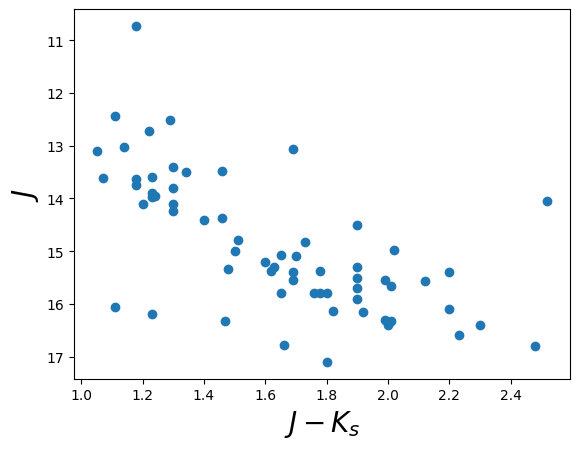

In [14]:
plt.scatter(data["Jmag"] - data["Kmag"], data["Jmag"]) # plot J-K vs. J
plt.ylim(reversed(plt.ylim())) # flip the y-axis
plt.xlabel("$J-K_s$", fontsize=20)
plt.ylabel("$J$", fontsize=20)

As a final example, we will plot the angular positions from the
catalog on a 2D projection of the sky. Instead of using `matplotlib`-style
plotting, we'll take a more object-oriented approach. We'll start by
creating a `Figure` object and adding a single subplot to the
figure. We can specify a projection with the `projection` keyword; in
this example we will use a Mollweide projection. Unfortunately, it is 
highly non-trivial to make the `matplotlib` projection defined this way 
follow the celestial convention of longitude/RA increasing to the left. 

The axis object, `ax`, knows to expect angular coordinate
values. An important fact is that it expects the values to be in
_radians_, and it expects the azimuthal angle values to be between
(-180º,180º). This is (currently) not customizable, so we have to
coerce our RA data to conform to these rules! `astropy` provides a
coordinate class for handling angular values, `astropy.coordinates.Angle`. 
We can convert our column of RA values to radians, and wrap the 
angle bounds using this class.

In [15]:
ra = coord.Angle(data['RA'].filled(np.nan)*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(data['Dec'].filled(np.nan)*u.degree)

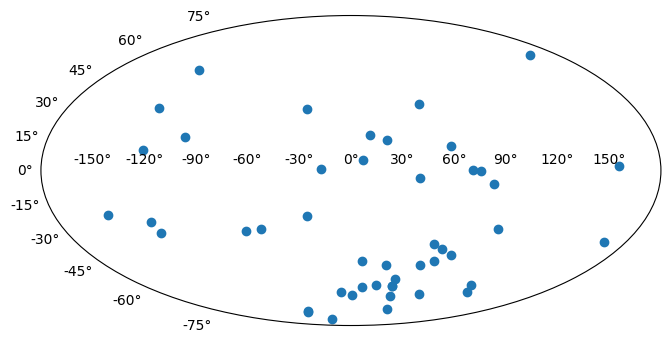

In [16]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian)

By default, matplotlib will add degree tick labels, so let's change the
horizontal (x) tick labels to be in units of hours, and display a grid:

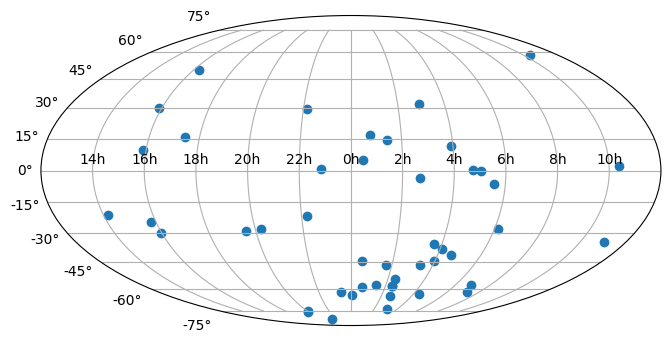

In [17]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)

We can save this figure as a PDF using the `savefig` function:

In [18]:
fig.savefig("map.pdf")

## Exercises

Make the map figures as just above, but color the points by the `'Kmag'` column of the table.

Try making the maps again, but with each of the following projections: `aitoff`, `hammer`, `lambert`, and `None` (which is the same as not giving any projection).  Do any of them make the data seem easier to understand?